In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from dataset import (
    gaussian_mixture_pdf,
    make_gaussian_mixture
)

In [2]:
X, y, pdf_values = make_gaussian_mixture(
    n_samples=1000,
    n_features=2,
    means=np.array([[-5, -5], [0, 5], [5, -2]]),
    covariances=np.array([[[2, 0], [0, 2]],
                          [[1, 0], [0, 3]],
                          [[3, 1], [1, 1]]]),
    weights=np.array([0.3, 0.4, 0.3]),
    return_pdf=True,
    random_state=42
)

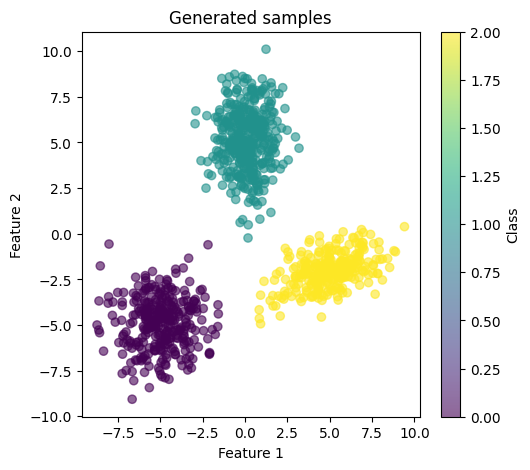

In [4]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Class')
plt.title('Generated samples')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [7]:
X = torch.tensor(X, dtype=torch.float32)
X.size()

torch.Size([1000, 2])

In [8]:
T = 1_000
beta_start = 1e-4
beta_end = 0.02

beta = torch.linspace(beta_start, beta_end, T)
alpha = 1 - beta

alpha_bar = torch.cumprod(alpha, dim=0)
sqrt_alpha = torch.sqrt(alpha)
sqrt_alpha_bar = torch.sqrt(alpha_bar)
sqrt_one_minus_alpha_bar = torch.sqrt(1 - alpha_bar)


def diffusion_kernel(x_0: torch.Tensor, t: torch.Tensor):
    sqrt_alpha_bar_t = sqrt_alpha_bar[t].view(-1, 1)
    sqrt_one_minus_alpha_bar_t = sqrt_one_minus_alpha_bar[t].view(-1, 1)
    epsilon_0 = torch.randn_like(x_0)
    x_t = sqrt_alpha_bar_t * x_0 + sqrt_one_minus_alpha_bar_t * epsilon_0
    return x_t

def forward_encoder(x_0: torch.Tensor):
    batch_size = x_0.size(0)

    # sample t
    t = torch.randint(1, T, (batch_size,), device=x_0.device)

    # sample the noise
    noise = torch.randn_like(x_0)

    # run the diffusion process
    x_t = diffusion_kernel(x_0=x_0, t=t)
    return noise, x_t, t

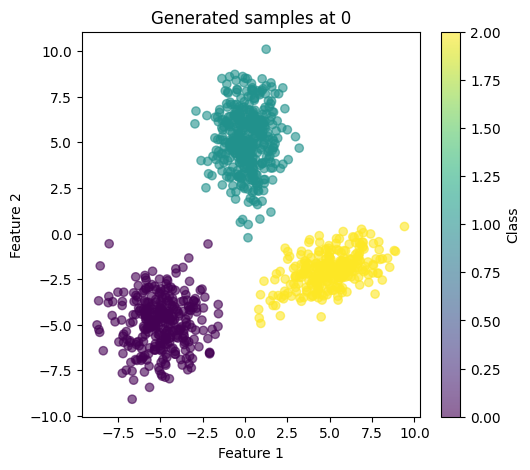

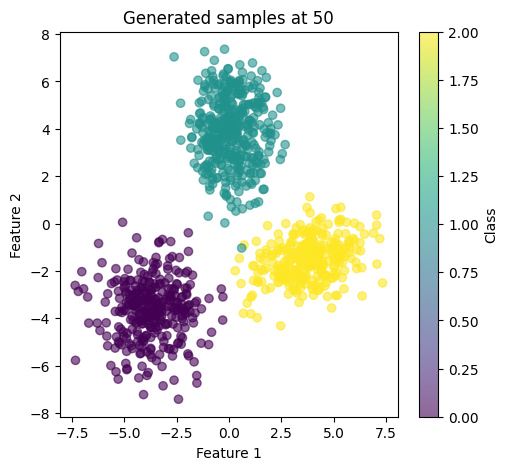

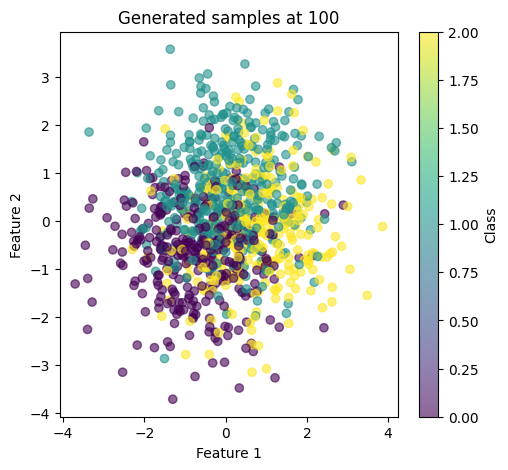

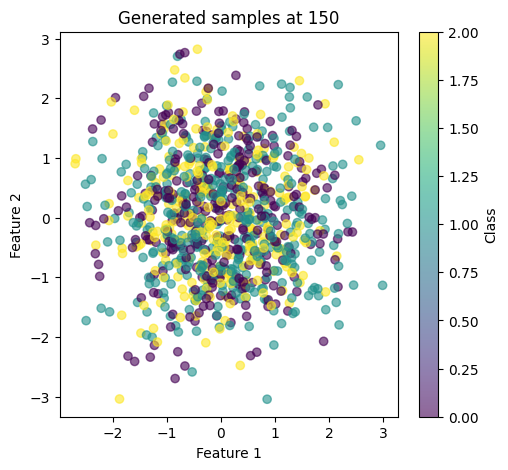

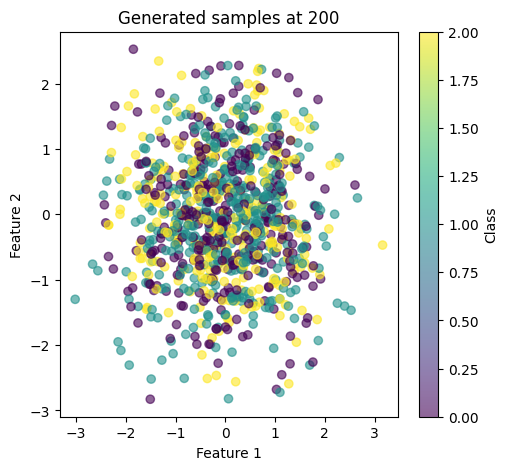

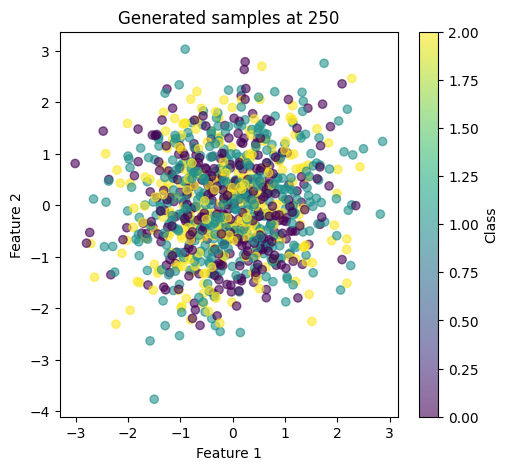

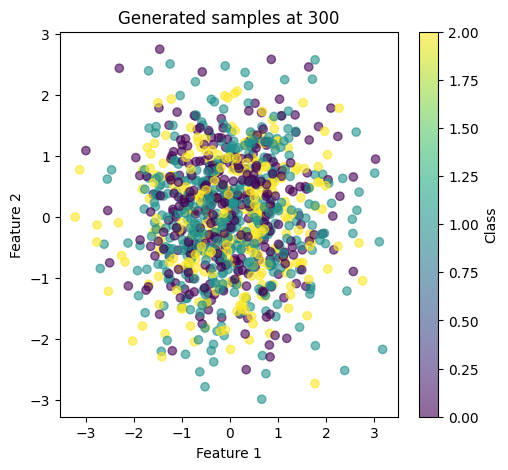

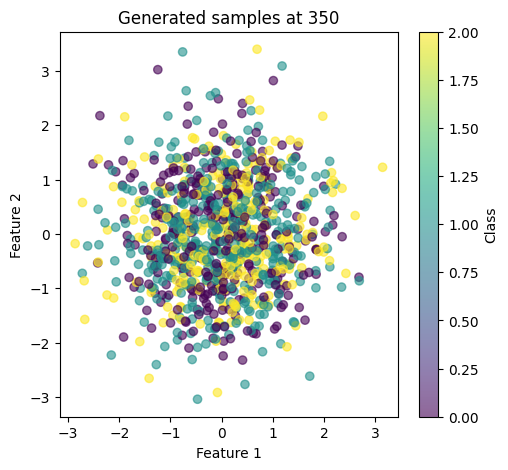

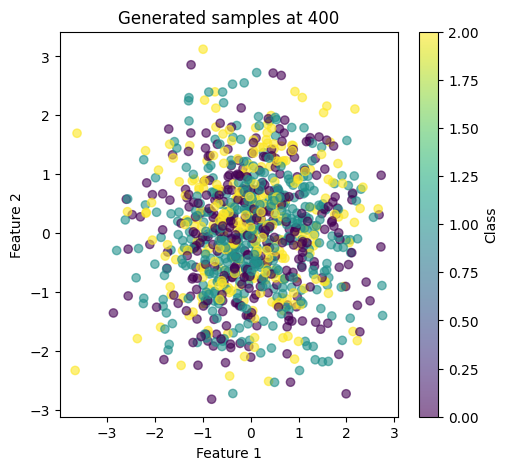

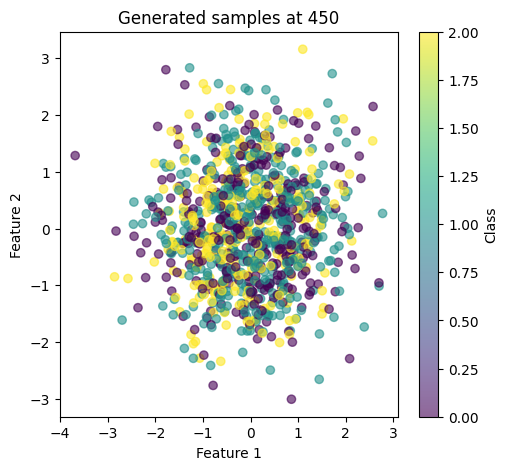

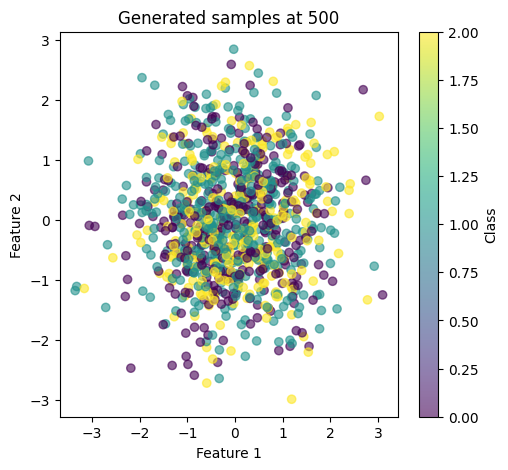

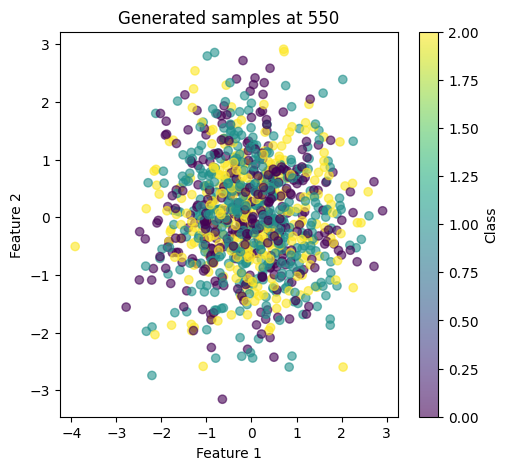

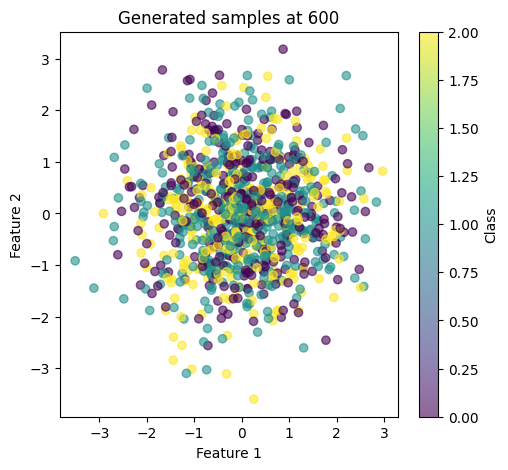

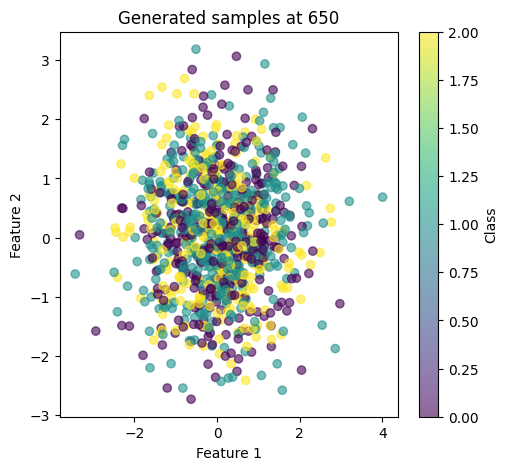

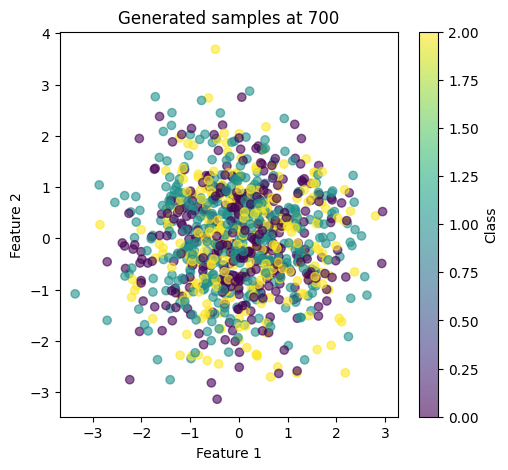

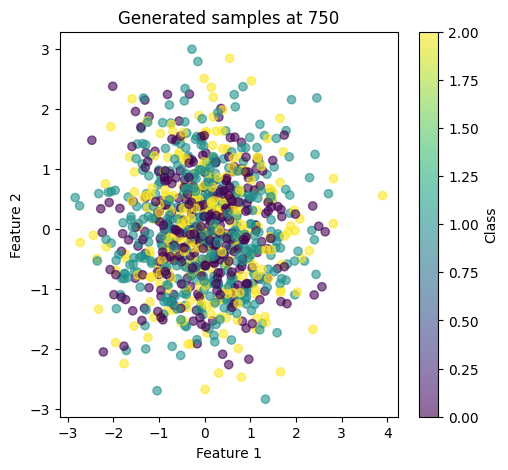

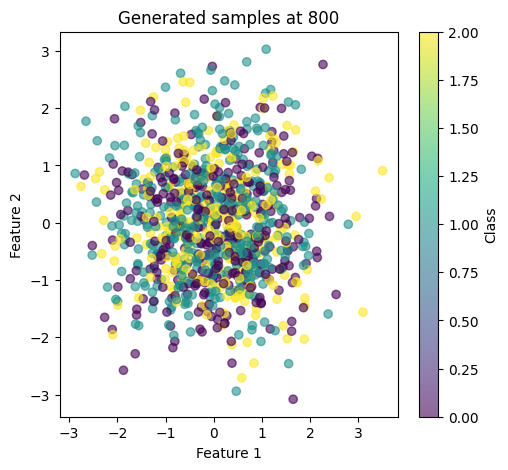

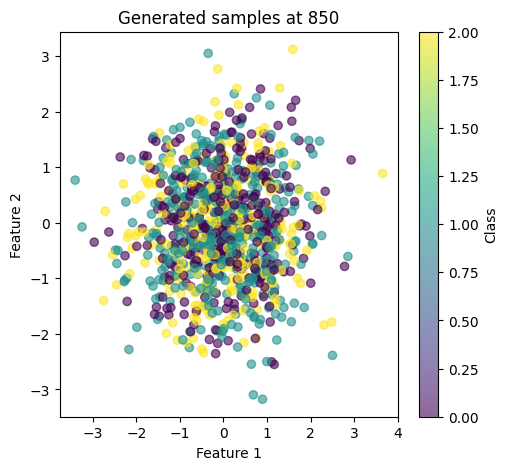

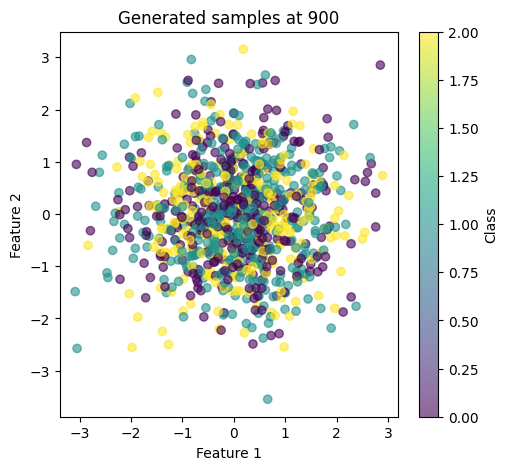

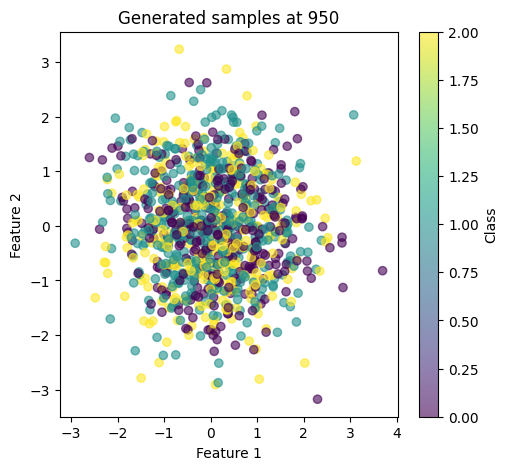

In [11]:
X_t = X
for t in range(T):
    X_t = diffusion_kernel(X_t, t)
    if t % 50 == 0:
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        scatter = plt.scatter(X_t[:, 0], X_t[:, 1], c=y, cmap='viridis', alpha=0.6)
        plt.colorbar(scatter, label='Class')
        plt.title(f'Generated samples at {t}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()